<a href="https://colab.research.google.com/github/JonatasFontele/DataScience/blob/main/lncc_dl_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Créditos

Os exemplos de código aqui apresentados são retirados/adaptados de pytorch.org/tutorials/beginner/blitz/

# Tensores

In [ ]:
import torch

In [ ]:
x = torch.empty(5, 3)
print(x)

tensor([[5.1973e-36, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.8026e-45],
        [0.0000e+00, 1.1210e-44, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 4.4025e-26]])


In [ ]:
x = torch.rand(5, 3)
print(x)

tensor([[0.0050, 0.7604, 0.0583],
        [0.5998, 0.0466, 0.6768],
        [0.8027, 0.3929, 0.4355],
        [0.2873, 0.6156, 0.2184],
        [0.9358, 0.8216, 0.6143]])


In [ ]:
x = torch.rand(5, 32, 32, 3)
print(x)
print(x.size())

tensor([[[[0.0141, 0.1697, 0.1743],
          [0.7074, 0.9593, 0.9388],
          [0.3803, 0.6356, 0.7127],
          ...,
          [0.5693, 0.1630, 0.2542],
          [0.7553, 0.1998, 0.6171],
          [0.3442, 0.6049, 0.5913]],

         [[0.0294, 0.9776, 0.7344],
          [0.4349, 0.1854, 0.6400],
          [0.3670, 0.9748, 0.5032],
          ...,
          [0.4587, 0.1876, 0.9926],
          [0.0395, 0.0345, 0.2065],
          [0.8996, 0.9260, 0.2149]],

         [[0.2029, 0.0884, 0.4296],
          [0.4700, 0.9035, 0.4185],
          [0.0337, 0.6239, 0.8301],
          ...,
          [0.4344, 0.4465, 0.8549],
          [0.8318, 0.2083, 0.2321],
          [0.3393, 0.1259, 0.5632]],

         ...,

         [[0.0734, 0.1134, 0.8877],
          [0.8312, 0.6103, 0.7075],
          [0.8019, 0.1647, 0.5110],
          ...,
          [0.3776, 0.4290, 0.7715],
          [0.4257, 0.3264, 0.3878],
          [0.0249, 0.4002, 0.2310]],

         [[0.6827, 0.0823, 0.6353],
          [0.3979

# AutoGrad

In [ ]:
import torch

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
y = x + 2
print(y)

z = y * y * 3
out = z.mean()

print(z, out)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [ ]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


$$
o = \frac{1}{4}\sum_i z_i
$$

$$
z_i = 3(x_i+2)^2
$$

$$
\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)
$$

$$
\left(z_i\bigr\rvert_{x_i=1} = 27\right) \Rightarrow \left(\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5\right)
$$

# CrossEntropyLoss

In [ ]:
loss = nn.CrossEntropyLoss()
input = torch.randn(10, 3, requires_grad=True)
target = torch.empty(10, dtype=torch.long).random_(3)
output = loss(input, target)
output.backward()
print('input:', input)
print('target:', target)
print('output:', output)

input: tensor([[-0.2203, -0.4656,  0.1692],
        [ 0.2702, -0.2993, -1.9377],
        [-0.4649, -0.5994, -1.2975],
        [-0.4820,  1.5314,  1.0974],
        [ 2.5178,  1.9212, -0.3888],
        [ 0.8948,  2.1120, -0.9386],
        [ 1.0620,  0.6840,  1.2253],
        [-0.0890, -0.5516, -1.5667],
        [ 1.5453,  1.2641, -0.8904],
        [-1.6637,  2.5074, -0.5465]], requires_grad=True)
target: tensor([0, 1, 0, 1, 1, 2, 1, 0, 1, 1])
output: tensor(1.1099, grad_fn=<NllLossBackward>)


In [ ]:
input = torch.FloatTensor(
       [[0.2046, -0.3144, 0.2438],
        [-0.0641,  0.2295, -0.1240],
        [ 1.4380,  1.6523,  0.3243],
        [ 1.4235,  0.5854, -0.9747],
        [ 3.1441, -1.2237, 10.2169],
        [ 0.2066,  0.1723,  1.0045],
        [-0.2114,  1.1299,  1.3391],
        [ 1.1068,  0.5069,  0.8790],
        [-0.7555,  0.0312, -0.2468],
        [ 0.1276,  0.3208, -1.2589]])
target = torch.LongTensor([2, 1, 1, 0, 2, 0, 2, 1, 1, 2])
output = loss(input, target)
print('output:', output)

madeup_target = torch.LongTensor([2, 1, 1, 0, 2, 2, 2, 0, 1, 1])
madeup_output = loss(input, madeup_target)
print('output:', madeup_output)

output: tensor(0.9646)
output: tensor(0.6669)


In [ ]:
import numpy as np

l1 = [[0.2046, 0.3144, 0.2438],
      [0.1876, 0.3208, 1.2589]]

l2 = [1, 2]

input = torch.FloatTensor(l1)
madeup_target = torch.LongTensor(l2)
madeup_output = loss(input, madeup_target)
print('output:', madeup_output)

output: tensor(0.7950)


In [ ]:
0.7950*2

1.59

In [ ]:
def celoss(x,a_class):
  denominator = np.sum(np.exp(x))
  return -np.log(np.exp(x[a_class])/denominator)

l1 = [[0.2046, 0.3144, 0.2438],
      [0.1876, 0.3208, 1.2589]]
a1 = np.asarray(l1)
print(a1[0])
print(a1[1])

print(compute_celoss(a1[0],0) + celoss(a1[1],0))
print(compute_celoss(a1[0],0) + celoss(a1[1],1))
print(celoss(a1[0],0) + celoss(a1[1],2))

print(celoss(a1[0],1) + celoss(a1[1],0))
print(celoss(a1[0],1) + celoss(a1[1],1))
print(celoss(a1[0],1) + celoss(a1[1],2)) # classificação perfeita


[0.2046 0.3144 0.2438]
[0.1876 0.3208 1.2589]
2.771008554769684
2.637808554769684
1.6997085547696842
2.661208554769684
2.5280085547696842
1.5899085547696843


In [ ]:
m = nn.Softmax(dim=1)
input = torch.randn(2, 3)
print('input:\n', input)
output = m(input)
print('output:\n', output)
print('output[0]:\n', output[0])
print('output[1]:\n', output[1])

print(torch.sum(output[0]))
print(torch.sum(output[1]))

input:
 tensor([[ 0.6527,  0.8684, -0.4120],
        [-0.0815, -0.3312, -0.7317]])
output:
 tensor([[0.3868, 0.4799, 0.1334],
        [0.4346, 0.3386, 0.2268]])
output[0]:
 tensor([0.3868, 0.4799, 0.1334])
output[1]:
 tensor([0.4346, 0.3386, 0.2268])
tensor(1.0000)
tensor(1.)


![alt text](https://ml-cheatsheet.readthedocs.io/en/latest/_images/cross_entropy.png)

# Dataset Iris

In [ ]:
#load
dataset = pd.read_csv('./iris.csv')
dataset.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Demo: rede neural simples

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 100)
        self.fc2 = nn.Linear(100, 3)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.softmax(X)

        return X
    
# load IRIS dataset
dataset = pd.read_csv('./iris.csv')

# transform species to numerics
dataset.loc[dataset.species=='Iris-setosa', 'species'] = 0
dataset.loc[dataset.species=='Iris-versicolor', 'species'] = 1
dataset.loc[dataset.species=='Iris-virginica', 'species'] = 2

train_X, test_X, train_y, test_y = train_test_split(dataset[dataset.columns[0:4]].values,
                                                    dataset.species.values, 
                                                    test_size=0.8, 
                                                    stratify=dataset.species)

# wrap up with Variable in pytorch
train_X = Variable(torch.Tensor(train_X).float())
test_X = Variable(torch.Tensor(test_X).float())
train_y = Variable(torch.Tensor(train_y).long())
test_y = Variable(torch.Tensor(test_y).long())


net = Net()

criterion = nn.CrossEntropyLoss()# cross entropy loss

optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

for epoch in range(100):
    optimizer.zero_grad()
    out = net(train_X)
    loss = criterion(out, train_y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print ('number of epoch', epoch, 'loss', loss.data.item())

predict_out = net(test_X)
_, predict_y = torch.max(predict_out, 1)

print ('prediction accuracy', accuracy_score(test_y.data, predict_y.data))

print ('macro precision', precision_score(test_y.data, predict_y.data, average='macro'))
print ('micro precision', precision_score(test_y.data, predict_y.data, average='micro'))
print ('macro recall', recall_score(test_y.data, predict_y.data, average='macro'))
print ('micro recall', recall_score(test_y.data, predict_y.data, average='micro'))

In [ ]:
from __future__ import print_function
from builtins import range
from sklearn.model_selection import train_test_split

"""
SECTION 1 : Load and setup data for training
the datasets separated in two files from originai datasets:
iris_train.csv = datasets for training purpose, 80% from the original data
iris_test.csv  = datasets for testing purpose, 20% from the original data
"""
import pandas as pd

#load
dataset = pd.read_csv('./iris.csv')

#change string value to numeric
dataset.loc[dataset['species']=='Iris-setosa', 'species']=0
dataset.loc[dataset['species']=='Iris-versicolor', 'species']=1
dataset.loc[dataset['species']=='Iris-virginica', 'species']=2
dataset = dataset.apply(pd.to_numeric)

#change dataframe to array
datatrain_array = dataset.values

#split x and y (feature and target)
xtrain = datatrain_array[:,:4]
ytrain = datatrain_array[:,4]

xtrain, xtest, ytrain, ytest = train_test_split(dataset[dataset.columns[0:4]].values,
                                                    dataset.species.values, test_size=0.8, 
                                                    stratify=dataset.species)

"""
SECTION 2 : Build and Train Model
Multilayer perceptron model, with one hidden layer.
input layer : 4 neuron, represents the feature of Iris
hidden layer : 3 neuron, activation using ReLU
output layer : 3 neuron, represents the class of Iris
optimizer = stochastic gradient descent with no batch-size
loss function = categorical cross entropy
learning rate = 0.01
epoch = 50
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1234)

#hyperparameters
hl = 3
lr = 0.01
num_epoch = 50

#build model
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, hl)
        self.fc2 = nn.Linear(hl, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
net = Net()

#choose optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

#train
for epoch in range(num_epoch):
    X = torch.Tensor(xtrain).float()
    Y = torch.Tensor(ytrain).long()

    #feedforward - backprop
    optimizer.zero_grad()
    out = net(X)
    loss = criterion(out, Y)
    loss.backward()
    optimizer.step()
    acc = 100 * torch.sum(Y==torch.max(out.data, 1)[1]).double() / len(Y)
    print ('Epoch [%d/%d] Loss: %.4f   Acc: %.4f' 
                   %(epoch+1, num_epoch, loss.item(), acc.item()))


"""
SECTION 3 : Testing model
"""

#get prediction
X = torch.Tensor(xtest).float()
Y = torch.Tensor(ytest).long()
out = net(X)
_, predicted = torch.max(out.data, 1)

#get accuration
print('Accuracy of the network %.4f %%' % (100 * torch.sum(Y==predicted).double() / len(Y)))

Epoch [1/50] Loss: 1.1443   Acc: 33.3333
Epoch [2/50] Loss: 1.1406   Acc: 33.3333
Epoch [3/50] Loss: 1.1371   Acc: 33.3333
Epoch [4/50] Loss: 1.1336   Acc: 33.3333
Epoch [5/50] Loss: 1.1302   Acc: 33.3333
Epoch [6/50] Loss: 1.1269   Acc: 33.3333
Epoch [7/50] Loss: 1.1237   Acc: 33.3333
Epoch [8/50] Loss: 1.1205   Acc: 33.3333
Epoch [9/50] Loss: 1.1174   Acc: 33.3333
Epoch [10/50] Loss: 1.1143   Acc: 33.3333
Epoch [11/50] Loss: 1.1113   Acc: 33.3333
Epoch [12/50] Loss: 1.1083   Acc: 33.3333
Epoch [13/50] Loss: 1.1053   Acc: 33.3333
Epoch [14/50] Loss: 1.1024   Acc: 33.3333
Epoch [15/50] Loss: 1.0995   Acc: 33.3333
Epoch [16/50] Loss: 1.0966   Acc: 33.3333
Epoch [17/50] Loss: 1.0938   Acc: 33.3333
Epoch [18/50] Loss: 1.0910   Acc: 33.3333
Epoch [19/50] Loss: 1.0882   Acc: 33.3333
Epoch [20/50] Loss: 1.0854   Acc: 33.3333
Epoch [21/50] Loss: 1.0827   Acc: 33.3333
Epoch [22/50] Loss: 1.0799   Acc: 33.3333
Epoch [23/50] Loss: 1.0772   Acc: 33.3333
Epoch [24/50] Loss: 1.0745   Acc: 33.3333
E

In [ ]:
import torch
import numpy as np

In [ ]:
class Feedforward(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
        def forward(self, x):
            hidden = self.fc1(x)
            relu = self.relu(hidden)
            output = self.fc2(relu)
            output = self.sigmoid(output)
            return output

In [ ]:
# CREATE RANDOM DATA POINTS
from sklearn.datasets import make_blobs
def blob_label(y, label, loc): # assign labels
    target = np.copy(y)
    for l in loc:
        target[y == l] = label
    return target
x_train, y_train = make_blobs(n_samples=40, n_features=2, cluster_std=1.5, shuffle=True)
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(blob_label(y_train, 0, [0]))
y_train = torch.FloatTensor(blob_label(y_train, 1, [1,2,3]))
x_test, y_test = make_blobs(n_samples=10, n_features=2, cluster_std=1.5, shuffle=True)
print(x_test)
print(y_test)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(blob_label(y_test, 0, [0]))
y_test = torch.FloatTensor(blob_label(y_test, 1, [1,2,3]))

In [ ]:
print(y_test)

tensor([0., 0., 1., 1., 1., 1., 1., 0., 1., 0.])


In [ ]:
model = Feedforward(2, 4)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [ ]:
model.eval()
y_pred = model(x_test)
before_train = criterion(y_pred.squeeze(), y_test)
print('Test loss before training' , before_train.item())

Test loss before training 0.8403955698013306


In [ ]:
model.train()
epoch = 200
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
   
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

In [ ]:
model.eval()
y_pred = model(x_test)
after_train = criterion(y_pred.squeeze(), y_test) 
print('Test loss after Training' , after_train.item())

Test loss after Training 0.7146216034889221


In [ ]:
from sklearn.metrics import classification_report
y_pred_np = y_pred.detach().numpy().round()
y_test_np = y_test.detach().numpy()
print(y_pred_np)
print(y_test_np)
print(classification_report(y_test_np, y_pred_np))

[[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
[0. 0. 1. 1. 1. 1. 1. 0. 1. 0.]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.43      0.50      0.46         6

    accuracy                           0.30        10
   macro avg       0.21      0.25      0.23        10
weighted avg       0.26      0.30      0.28        10



# Demo: Batch training, Learning curves, Early Stopping, Dropout

O exemplo de código a seguir é uma adaptação do encontrado em https://github.com/Bjarten/early-stopping-pytorch/blob/master/MNIST_Early_Stopping_example.ipynb

In [ ]:
# import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

def create_datasets(batch_size):

    # percentage of training set to use as validation
    valid_size = 0.2

    # convert data to torch.FloatTensor
    transform = transforms.ToTensor()

    # choose the training and test datasets
    train_data = datasets.MNIST(root='data', 
                                train=True,
                                download=True, 
                                transform=transform)

    test_data = datasets.MNIST(root='data',
                               train=False,
                               download=True,
                               transform=transform)

    # obtain training indices that will be used for validation
    num_train = len(train_data)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[split:], indices[:split]
    
    # define samplers for obtaining training and validation batches
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)
    
    # load training data in batches
    train_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               sampler=train_sampler,
                                               num_workers=0)
    
    # load validation data in batches
    valid_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               sampler=valid_sampler,
                                               num_workers=0)
    
    # load test data in batches
    test_loader = torch.utils.data.DataLoader(test_data,
                                              batch_size=batch_size,
                                              num_workers=0)
    
    return train_loader, test_loader, valid_loader

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)
    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
def train_model(model, batch_size, patience, n_epochs):
    
    # to track the training loss as the model trains
    train_losses = []
    # to track the validation loss as the model trains
    valid_losses = []
    # to track the average training loss per epoch as the model trains
    avg_train_losses = []
    # to track the average validation loss per epoch as the model trains
    avg_valid_losses = [] 
    
    # initialize the early_stopping object
    early_stopping = EarlyStopping(patience=patience, verbose=True)
    
    for epoch in range(1, n_epochs + 1):

        ###################
        # train the model #
        ###################
        model.train() # prep model for training
        for batch, (data, target) in enumerate(train_loader, 1):
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # record training loss
            train_losses.append(loss.item())

        ######################    
        # validate the model #
        ######################
        model.eval() # prep model for evaluation
        for data, target in valid_loader:
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # record validation loss
            valid_losses.append(loss.item())

        # print training/validation statistics 
        # calculate average loss over an epoch
        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)
        
        epoch_len = len(str(n_epochs))
        
        print_msg = (f'[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                     f'train_loss: {train_loss:.5f} ' +
                     f'valid_loss: {valid_loss:.5f}')
        
        print(print_msg)
        
        # clear lists to track next epoch
        train_losses = []
        valid_losses = []
        
        # early_stopping needs the validation loss to check if it has decresed, 
        # and if it has, it will make a checkpoint of the current model
        early_stopping(valid_loss, model)
        
        if early_stopping.early_stop:
            print("Early stopping")
            break
        
    # load the last checkpoint with the best model
    model.load_state_dict(torch.load('checkpoint.pt'))

    return  model, avg_train_losses, avg_valid_losses

In [ ]:
n_epochs = 100
batch_size = 128

train_loader, test_loader, valid_loader = create_datasets(batch_size)

# early stopping patience; how long to wait after last time validation loss improved.
patience = 20

model, train_loss, valid_loss = train_model(model, batch_size, patience, n_epochs)


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!
[  1/100] train_loss: 0.67765 valid_loss: 0.26069
Validation loss decreased (inf --> 0.260689).  Saving model ...
[  2/100] train_loss: 0.32582 valid_loss: 0.19368
Validation loss decreased (0.260689 --> 0.193679).  Saving model ...
[  3/100] train_loss: 0.26599 valid_loss: 0.16314
Validation loss decreased (0.193679 --> 0.163142).  Saving model ...
[  4/100] train_loss: 0.23241 valid_loss: 0.14661
Validation loss decreased (0.163142 --> 0.146615).  Saving model ...
[  5/100] train_loss: 0.21010 valid_loss: 0.13294
Validation loss decreased (0.146615 --> 0.132936).  Saving model ...
[  6/100] train_loss: 0.19619 valid_loss: 0.12647
Validation loss decreased (0.132936 --> 0.126467).  Saving model ...
[  7/100] train_loss: 0.18322 valid_loss: 0.12248
Validation loss decreased (0.126467 --> 0.122484).  Saving model ...
[  8/100] train_loss: 0.17486 valid_loss: 0.11344
Validation loss decreased (0.12

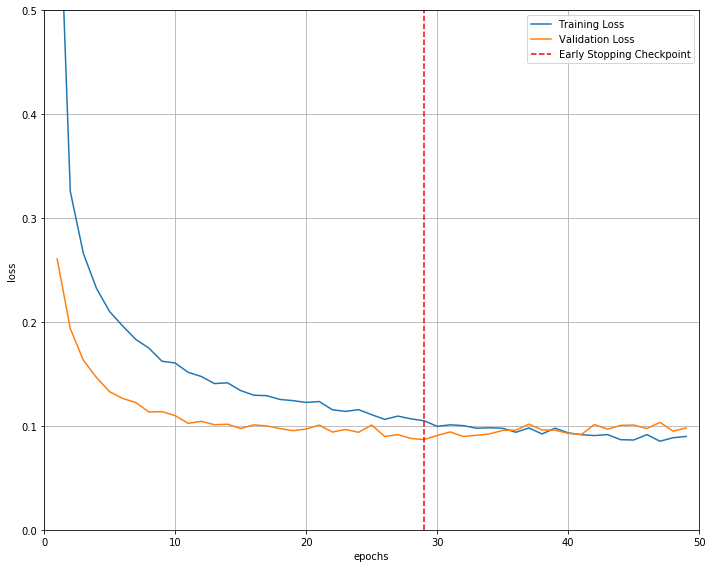

In [ ]:
# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

# find position of lowest validation loss
minposs = valid_loss.index(min(valid_loss))+1 
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 0.5) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

In [ ]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    if len(target.data) != batch_size:
        break
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.082543

Test Accuracy of     0: 99% (970/979)
Test Accuracy of     1: 99% (1122/1133)
Test Accuracy of     2: 97% (1007/1030)
Test Accuracy of     3: 98% (992/1008)
Test Accuracy of     4: 97% (957/980)
Test Accuracy of     5: 97% (868/890)
Test Accuracy of     6: 97% (936/956)
Test Accuracy of     7: 97% (999/1027)
Test Accuracy of     8: 96% (940/973)
Test Accuracy of     9: 96% (972/1008)

Test Accuracy (Overall): 97% (9763/9984)


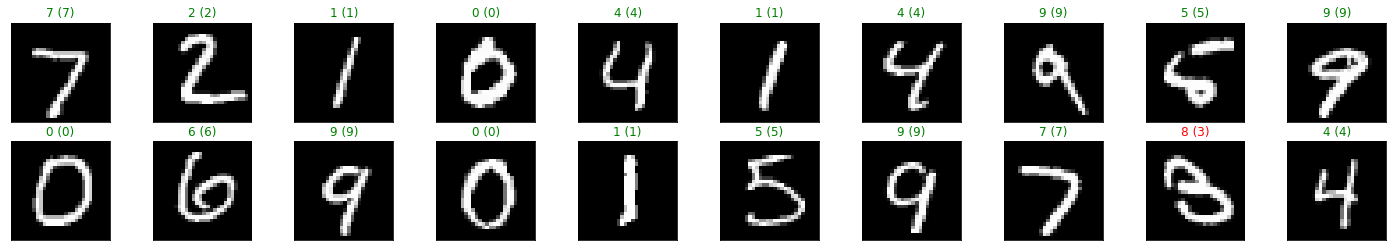

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

# convnets

## filters

In [ ]:
from skimage import exposure
from skimage import data  # most functions are in subpackages
camera = data.camera()
camera_equalized = exposure.equalize_hist(camera)

import os
filename = os.path.join(skimage.data_dir, 'camera.png')
camera = io.imread(filename)



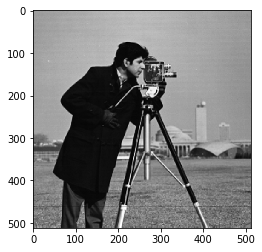

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(camera, cmap='gray', interpolation='nearest') 

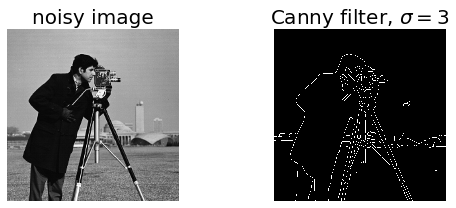

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

import skimage
import skimage.feature
from skimage.viewer import ImageViewer

from skimage import feature

# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

im = camera

# Compute the Canny filter
edges = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title(r'Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

## Demo: image classification on CIFAR10

In [ ]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
#The compose function allows for multiple transforms
#transforms.ToTensor() converts our PILImage to a tensor of shape (C x H x W) in the range [0,1]
#transforms.Normalize(mean,std) normalizes a tensor to a (mean, std) for (R, G, B)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./cifardata', train=True, download=True, transform=transform)

test_set = torchvision.datasets.CIFAR10(root='./cifardata', train=False, download=True, transform=transform)


Extracting ./cifardata/cifar-10-python.tar.gz to ./cifardata
Files already downloaded and verified


In [ ]:
from torch.autograd import Variable
import torch.nn.functional as F

class SimpleCNN(torch.nn.Module):
    
    #Our batch shape for input x is (3, 32, 32)
    
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        #Input channels = 3, output channels = 18
        self.conv1 = torch.nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        #4608 input features, 64 output features (see sizing flow below)
        self.fc1 = torch.nn.Linear(18 * 16 * 16, 64)
        
        #64 input features, 10 output features for our 10 defined classes
        self.fc2 = torch.nn.Linear(64, 10)
        
    def forward(self, x):
        
        #Computes the activation of the first convolution
        #Size changes from (3, 32, 32) to (18, 32, 32)
        x = F.relu(self.conv1(x))
        
        #Size changes from (18, 32, 32) to (18, 16, 16)
        x = self.pool(x)
        
        #Reshape data to input to the input layer of the neural net
        #Size changes from (18, 16, 16) to (1, 4608)
        #Recall that the -1 infers this dimension from the other given dimension
        x = x.view(-1, 18 * 16 *16)
        
        #Computes the activation of the first fully connected layer
        #Size changes from (1, 4608) to (1, 64)
        x = F.relu(self.fc1(x))
        
        #Computes the second fully connected layer (activation applied later)
        #Size changes from (1, 64) to (1, 10)
        x = self.fc2(x)
        return(x)

In [ ]:
import time

def trainNet(net, batch_size, n_epochs, learning_rate):
    
    #Print all of the hyperparameters of the training iteration:
    print("===== HYPERPARAMETERS =====")
    print("batch_size=", batch_size)
    print("epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("=" * 30)
    
    #Get training data
    train_loader = get_train_loader(batch_size)
    n_batches = len(train_loader)
    
    #Create our loss and optimizer functions
    loss, optimizer = createLossAndOptimizer(net, learning_rate)
    
    #Time for printing
    training_start_time = time.time()
    
    #Loop for n_epochs
    for epoch in range(n_epochs):
        
        running_loss = 0.0
        print_every = n_batches // 10
        start_time = time.time()
        total_train_loss = 0
        
        for i, data in enumerate(train_loader, 0):
            
            #Get inputs
            inputs, labels = data
            
            #Wrap them in a Variable object
            inputs, labels = Variable(inputs), Variable(labels)
            
            #Set the parameter gradients to zero
            optimizer.zero_grad()
            
            #Forward pass, backward pass, optimize
            outputs = net(inputs)
            loss_size = loss(outputs, labels)
            loss_size.backward()
            optimizer.step()
            
            #Print statistics
            running_loss += loss_size.data
            total_train_loss += loss_size.data
            
            #Print every 10th batch of an epoch
            if (i + 1) % (print_every + 1) == 0:
                print("Epoch {}, {:d}% \t train_loss: {:.2f} took: {:.2f}s".format(
                        epoch+1, int(100 * (i+1) / n_batches), running_loss / print_every, time.time() - start_time))
                #Reset running loss and time
                running_loss = 0.0
                start_time = time.time()
            
        #At the end of the epoch, do a pass on the validation set
        total_val_loss = 0
        for inputs, labels in val_loader:
            
            #Wrap tensors in Variables
            inputs, labels = Variable(inputs), Variable(labels)
            
            #Forward pass
            val_outputs = net(inputs)
            val_loss_size = loss(val_outputs, labels)
            total_val_loss += val_loss_size.data
            
        print("Validation loss = {:.2f}".format(total_val_loss / len(val_loader)))
        
    print("Training finished, took {:.2f}s".format(time.time() - training_start_time))

In [ ]:
#DataLoader takes in a dataset and a sampler for loading (num_workers deals with system level memory) 
def get_train_loader(batch_size):
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                           sampler=train_sampler, num_workers=2)
    return(train_loader)

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler

#Training
n_training_samples = 20000
train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))

#Validation
n_val_samples = 5000
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))

#Test
n_test_samples = 5000
test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))

In [ ]:
import torch.optim as optim

def createLossAndOptimizer(net, learning_rate=0.001):
    
    #Loss function
    loss = torch.nn.CrossEntropyLoss()
    
    #Optimizer
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    
    return(loss, optimizer)

In [ ]:
#Test and validation loaders have constant batch sizes, so we can define them directly
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4, sampler=test_sampler, num_workers=2)
val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler, num_workers=2)

In [ ]:
CNN = SimpleCNN()
trainNet(CNN, batch_size=32, n_epochs=5, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 32
epochs= 5
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.08 took: 1.35s
Epoch 1, 20% 	 train_loss: 1.82 took: 1.25s
Epoch 1, 30% 	 train_loss: 1.68 took: 1.31s
Epoch 1, 40% 	 train_loss: 1.64 took: 1.26s
Epoch 1, 50% 	 train_loss: 1.56 took: 1.31s
Epoch 1, 60% 	 train_loss: 1.52 took: 1.28s
Epoch 1, 70% 	 train_loss: 1.47 took: 1.27s
Epoch 1, 80% 	 train_loss: 1.44 took: 1.28s
Epoch 1, 90% 	 train_loss: 1.39 took: 1.29s
Validation loss = 1.33
Epoch 2, 10% 	 train_loss: 1.32 took: 1.42s
Epoch 2, 20% 	 train_loss: 1.29 took: 1.44s
Epoch 2, 30% 	 train_loss: 1.30 took: 1.44s
Epoch 2, 40% 	 train_loss: 1.26 took: 1.39s
Epoch 2, 50% 	 train_loss: 1.24 took: 1.33s
Epoch 2, 60% 	 train_loss: 1.26 took: 1.39s
Epoch 2, 70% 	 train_loss: 1.26 took: 1.43s
Epoch 2, 80% 	 train_loss: 1.28 took: 1.44s
Epoch 2, 90% 	 train_loss: 1.23 took: 1.41s
Validation loss = 1.22
Epoch 3, 10% 	 train_loss: 1.08 took: 1.45s
Epoch 3, 20% 	 train_loss: 1.09 took: 1.38s


# Demo: LSTMs for POS tagging

O código desta seção é adaptado de https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [ ]:
def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)


training_data = [
    ("The dog ate the apple".split(), ["DET", "NN", "V", "DET", "NN"]),
    ("Everybody read that book".split(), ["NN", "V", "DET", "NN"])
]
word_to_ix = {}
for sent, tags in training_data:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
print(word_to_ix)
tag_to_ix = {"DET": 0, "NN": 1, "V": 2}

# These will usually be more like 32 or 64 dimensional.
# We will keep them small, so we can see how the weights change as we train.
EMBEDDING_DIM = 6
HIDDEN_DIM = 6

{'The': 0, 'dog': 1, 'ate': 2, 'the': 3, 'apple': 4, 'Everybody': 5, 'read': 6, 'that': 7, 'book': 8}


In [ ]:
class LSTMTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [ ]:
model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word_to_ix), len(tag_to_ix))
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# See what the scores are before training
# Note that element i,j of the output is the score for tag j for word i.
# Here we don't need to train, so the code is wrapped in torch.no_grad()
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)
    print(tag_scores)

for epoch in range(300):  # again, normally you would NOT do 300 epochs, it is toy data
    for sentence, tags in training_data:
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Get our inputs ready for the network, that is, turn them into
        # Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = prepare_sequence(tags, tag_to_ix)

        # Step 3. Run our forward pass.
        tag_scores = model(sentence_in)

        # Step 4. Compute the loss, gradients, and update the parameters by
        #  calling optimizer.step()
        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()

# See what the scores are after training
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)

    # The sentence is "the dog ate the apple".  i,j corresponds to score for tag j
    # for word i. The predicted tag is the maximum scoring tag.
    # Here, we can see the predicted sequence below is 0 1 2 0 1
    # since 0 is index of the maximum value of row 1,
    # 1 is the index of maximum value of row 2, etc.
    # Which is DET NOUN VERB DET NOUN, the correct sequence!
    print(tag_scores)

tensor([[-1.0500, -0.9256, -1.3714],
        [-1.0188, -0.9739, -1.3419],
        [-1.1330, -0.9662, -1.2126],
        [-1.1818, -0.9763, -1.1501],
        [-1.0766, -0.9916, -1.2439]])
tensor([[-0.3892, -1.2426, -3.3890],
        [-2.1082, -0.1328, -5.8464],
        [-3.0852, -5.9469, -0.0495],
        [-0.0499, -3.4414, -4.0961],
        [-2.4540, -0.0929, -5.8799]])


    ("The dog ate the apple", ["DET", "NN", "V", "DET", "NN"]),

    {"DET": 0, "NN": 1, "V": 2}
